# USE CASE : TIME SERIES ANALYSIS
Time Series is a sequence of well-defined data points measured at consistent time intervals over a period of time. <br>
Time series analysis is the use of statistical methods to analyze time series data and extract meaningful statistics and characteristics about the data. In this analysis, you just have one variable : TIME. <br>
Time series analysisis is used to analyse time series data in order to extract meaningful statistics and other characteristics. It is used to predict the future values based on the previous observed values. <br>
The Model used is **ARIMA**.

## 1. LOAD DATA TRAINING
Read data to perform Machine Learning Modelling 'Time Series Analysis' by input as 'time' variable

In [340]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import statsmodels.api as sm  
from statsmodels.tsa.arima_model import ARIMA, ARMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.statespace.sarimax import SARIMAX

warnings.filterwarnings("ignore") # specify to ignore warning messages
import warnings
import itertools

%matplotlib inline
plt.rcParams.update({'figure.figsize':(17,5), 'figure.dpi' : 120})

In [105]:
import datetime
time=pd.read_excel('Exercise1.xlsx')
time.head(10)

,Sales,AdBudget,GDP
1981-03-01,1020.2,659.2,251.8
1981-06-01,889.2,589.0,290.9
1981-09-01,795.0,512.5,290.8
1981-12-01,1003.9,614.1,292.4
1982-03-01,1057.7,647.2,279.1
1982-06-01,944.4,602.0,254.0
1982-09-01,778.5,530.7,295.6
1982-12-01,932.5,608.4,271.7
1983-03-01,996.5,637.9,259.6
1983-06-01,907.7,582.4,280.5


In [106]:
time.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 1981-03-01 to 2005-12-01
Data columns (total 3 columns):
Sales       100 non-null float64
AdBudget    100 non-null float64
GDP         100 non-null float64
dtypes: float64(3)
memory usage: 3.1 KB


IF want to Converting 'TIME' column as 'date_time' for modeling

In [107]:
#time['Unnamed: 0']=pd.to_datetime(time['Unnamed: 0'], infer_datetime_format=True)
#indexedtime=time.set_index(['Unnamed: 0'])

In [108]:
#time.info()

## 2. DATA UNDERSTANDING
Do some quick-look about data we're about to explore by run the dimension, data type, head/tail, summary statistics, etc 
to understand the data itself.<br>
Sales contains the quarterly sales for a small company over the period 1981–2005. AdBudget is the advertising budget and GDP is the gross domestic product. All series have been adjusted for inflation.

In [109]:
time.shape

(100, 3)

In [110]:
print(type(time))

<class 'pandas.core.frame.DataFrame'>


In [111]:
time.tail()

,Sales,AdBudget,GDP
2004-12-01,1018.7,634.9,284.0
2005-03-01,1112.5,663.1,270.9
2005-06-01,997.4,583.3,294.7
2005-09-01,826.8,508.6,292.2
2005-12-01,992.6,634.2,255.1


In [112]:
print(time.columns)

Index(['Sales', 'AdBudget', 'GDP'], dtype='object')


In [113]:
time.dtypes

Sales       float64
AdBudget    float64
GDP         float64
dtype: object

In [114]:
time.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 1981-03-01 to 2005-12-01
Data columns (total 3 columns):
Sales       100 non-null float64
AdBudget    100 non-null float64
GDP         100 non-null float64
dtypes: float64(3)
memory usage: 3.1 KB


In [115]:
time.describe()

,Sales,AdBudget,GDP
count,100.000000,100.000000,100.000000
mean,948.737000,591.933000,281.183000
std,98.252187,54.342461,14.370488
min,735.100000,489.900000,249.300000
25%,871.100000,569.475000,271.350000
50%,960.650000,608.500000,282.600000
75%,1018.700000,634.975000,290.300000
max,1115.500000,665.900000,330.600000


## 3. DATA CLEANSING
Cleanse and prepare time series data by detecting outlier, missing value, etc.

### Missing Value Detection
Identifying any missing values in the data before perform any analysis. It's actually depend on the purpose of the performance, but if there is any missing values, we can cleanse and prepare it by either remove it from dataframe or doing imputation.

In [116]:
time.isnull().sum().sort_values(ascending=False)

GDP         0
AdBudget    0
Sales       0
dtype: int64

### Outlier Detection
Outlier detection can be seen by visualize with boxplot.

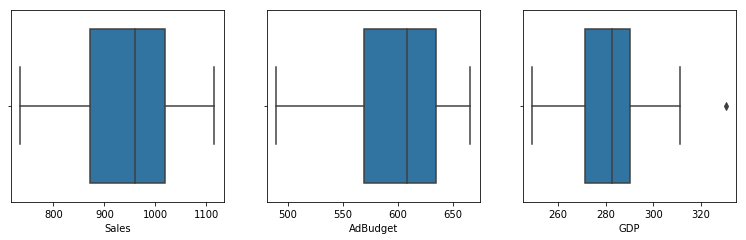

In [118]:
#define the distributin plot of each of numerical variables to see outlier
#determine the size of the figure plot
fig=plt.figure(figsize=(13,12))
axes=330
#using boxplot to visualize each numerical variables in one single loop 
for num in out:
    axes+=1
    fig.add_subplot(axes)
    sns.boxplot(data=time, x=num)

plt.show()

From the result above it can be seen that there is no outlier in data except for GDP.<br>
There is only an outlier and it's not far from the maximum point, and not categorized as an outlier.

## 3. DATA EXPLORATION
We can get Insight by visualizing the data by plot. From the visualization we can determine the possible fitted model.

### Correlation
Correlation can be seen by visualize with heatmap.

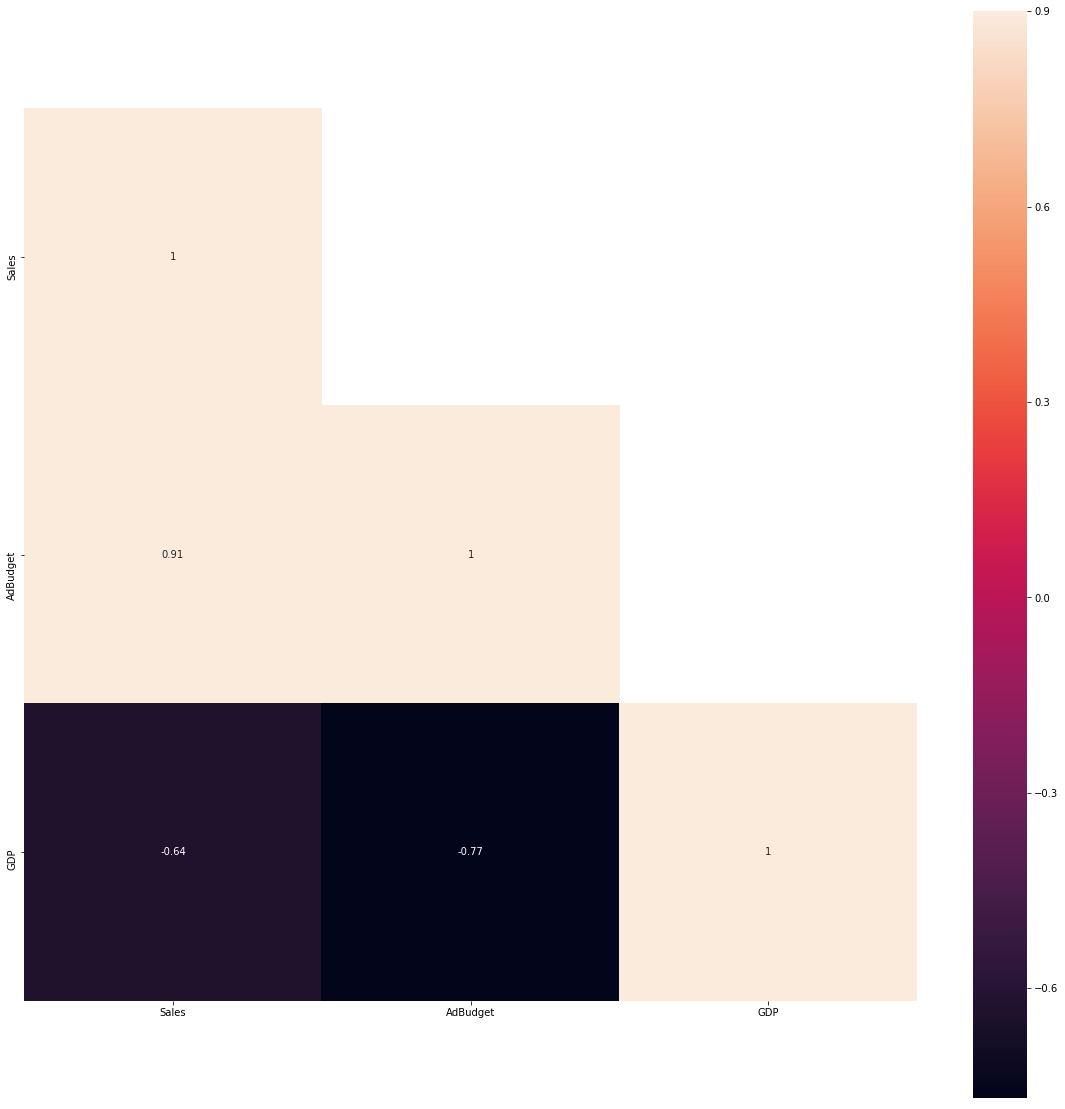

In [101]:
#We want to know the correlation between target variable and all other variables by using pearson (numerical and numerical)
#create correlation with heatmap
corr = time.corr(method = 'pearson')
#convert correlation to numpy array
mask = np.array(corr)
#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (13,12))
fig.set_size_inches(20,20)
sns.heatmap(corr, 
            mask = mask, 
            vmax = 0.9, 
            square = True, 
            annot = True)

### Define Target Variable
Separate 'time' variable with target variable 'Sales'

In [122]:
time1=time.drop(['AdBudget', 'GDP'], 1)
time1.head()

,Sales
1981-03-01,1020.2
1981-06-01,889.2
1981-09-01,795.0
1981-12-01,1003.9
1982-03-01,1057.7


### Seasonality Test
To determine the component of time series data and which model is gonna be useful.

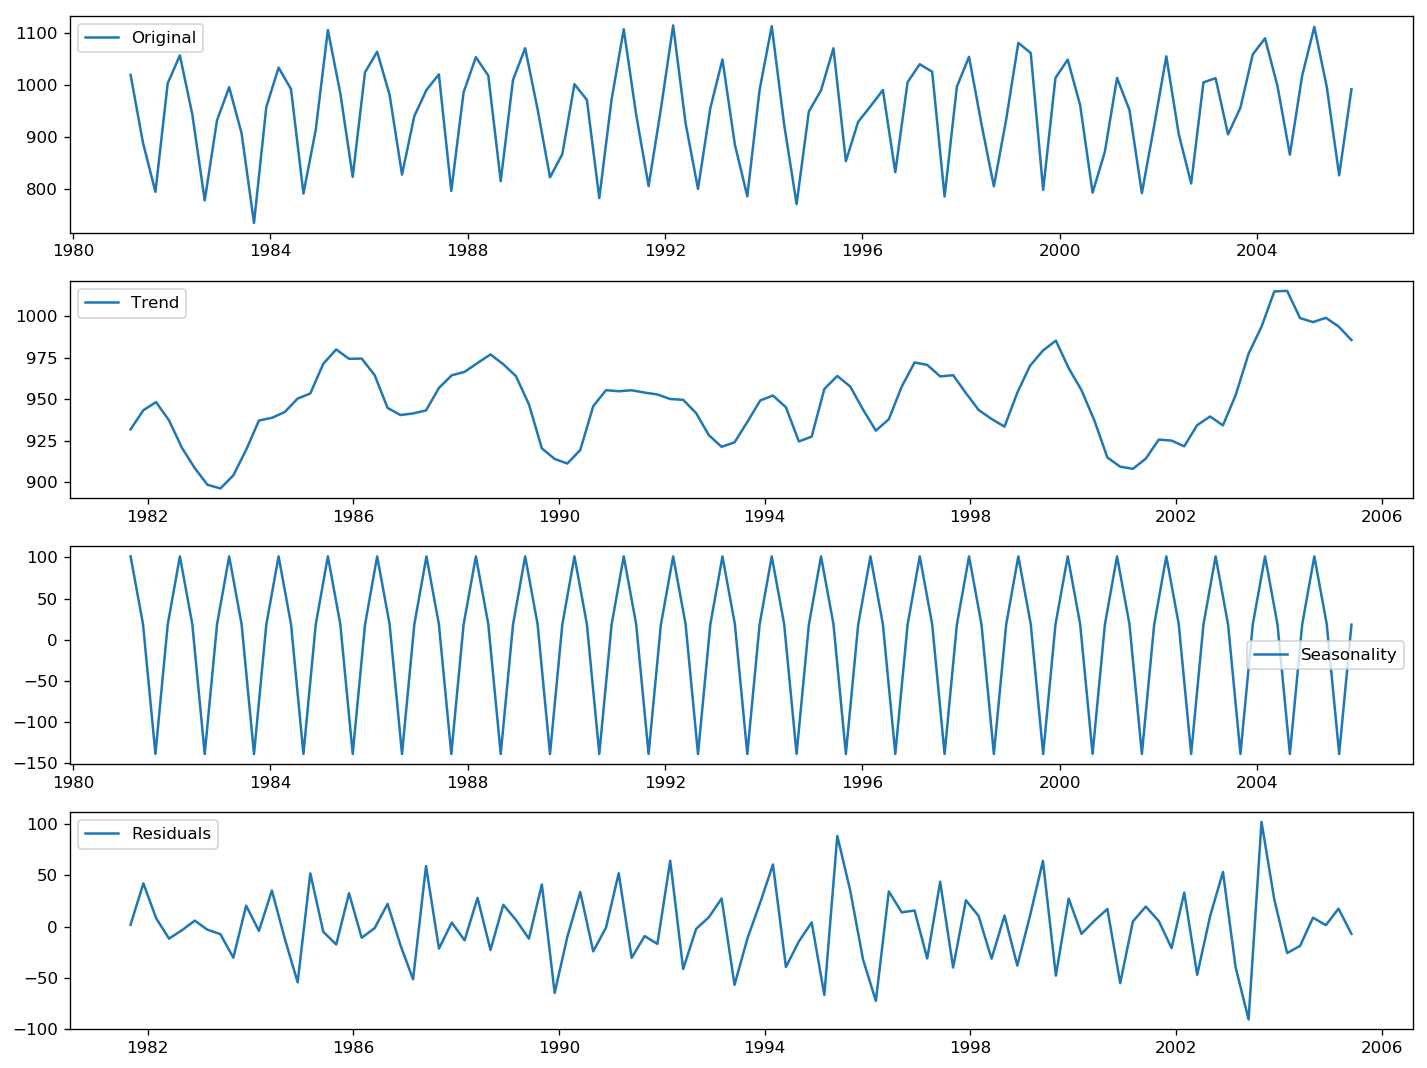

In [323]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(time1['Sales'])

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.figure(figsize=(12,9))
plt.subplot(411)
plt.plot(time1, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

It can be seen that the data has no trend but has seasonality effects. So, in this case, we can use both the ARIMA model and SARIMA model and compare between that two models.

### Plot Graph
Plotting graph to see stationary of the data

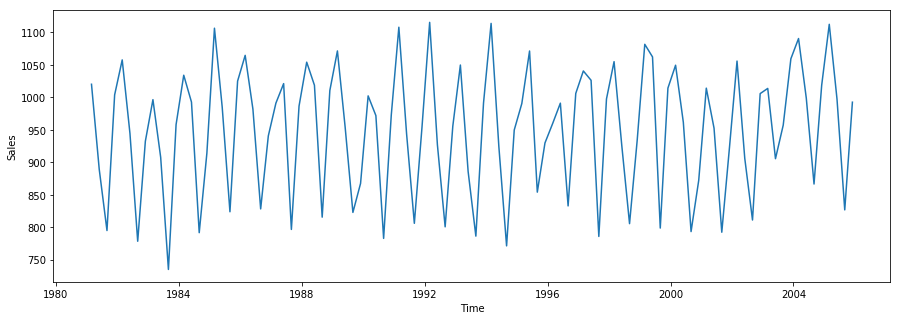

In [162]:
plt.figure(figsize=(15,5))
plt.xlabel("Time")
plt.ylabel("Sales")
plt.plot(time1)

At first glance it seems that the graph plot is stationary, but we need to be convinced further by determining rolling statistics, rolling mean and rolling std by Hypotesis test.

## 3. MACHINE LEARNING MODEL I
### Forecasting : Define Parameter = ARIMA (p,d,q)

Given this data is a timeseries with a decent amount of past values, I use an ARIMA model for fitting and forecasting efforts.

### Stationary Test
To use ARIMA, I need to first ensure the data is stationary (time, variance, co-variance should not be dependent on time). I'll use the Dickey-Fuller Test Statitic (which statsmodel library includes already).<br>
To determine whether we need differences or not and to determine order 'd' of ARIMA Model.

In [168]:
#Determine Rolling Statistics
rolmean = pd.rolling_mean(time1, window=12)
rolstd = pd.rolling_std(time1, window=12)
print(rolmean, rolstd)
    


                 Sales
1981-03-01         NaN
1981-06-01         NaN
1981-09-01         NaN
1981-12-01         NaN
1982-03-01         NaN
1982-06-01         NaN
1982-09-01         NaN
1982-12-01         NaN
1983-03-01         NaN
1983-06-01         NaN
1983-09-01         NaN
1983-12-01  918.233333
1984-03-01  919.391667
1984-06-01  928.025000
1984-09-01  927.750000
1984-12-01  920.275000
1985-03-01  924.341667
1985-06-01  927.733333
1985-09-01  931.516667
1985-12-01  939.233333
1986-03-01  944.916667
1986-06-01  951.100000
1986-09-01  958.866667
1986-12-01  957.416667
1987-03-01  953.833333
1987-06-01  956.200000
1987-09-01  956.616667
1987-12-01  962.650000
1988-03-01  958.291667
1988-06-01  961.091667
...                ...
1998-09-01  946.350000
1998-12-01  946.708333
1999-03-01  956.883333
1999-06-01  962.816667
1999-09-01  959.975000
1999-12-01  960.658333
2000-03-01  961.391667
2000-06-01  956.008333
2000-09-01  956.633333
2000-12-01  946.191667
2001-03-01  942.791667
2001-06-01 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).mean()
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).std()
  This is separate from the ipykernel package so we can avoid doing imports until


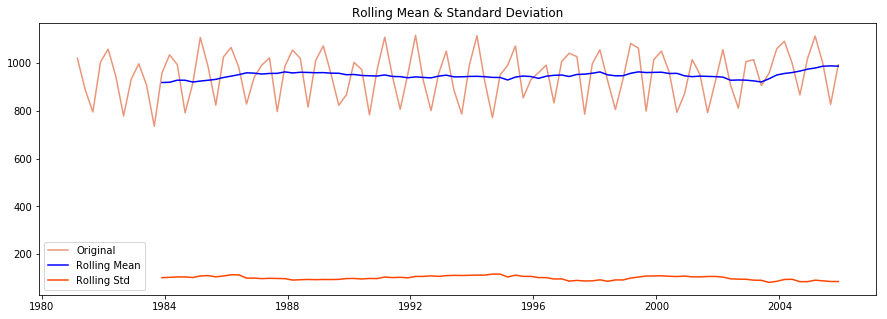

In [142]:
#Plot Rolling Statistics:
plt.figure(figsize=(15,5))
orig = plt.plot(time1, color='darksalmon',label='Original')
mean = plt.plot(rolmean, color='blue', label='Rolling Mean')
std = plt.plot(rolstd, color='orangered', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [159]:
#Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller

print ('Results of Dickey-Fuller Test:')
dftest = adfuller(time1['Sales'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
  dfoutput['Critical Value (%s)' %key] = value
  
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                 -3.262755
p-value                         0.016628
#Lags Used                      9.000000
Number of Observations Used    90.000000
Critical Value (1%)            -3.505190
Critical Value (5%)            -2.894232
Critical Value (10%)           -2.584210
dtype: float64


By Hypothesis Test, it can be seen that based on results above with hypothesis:<br>
H0 : Not Stationary <br>
H1 : Stationary <br>
We can get conclusion that with : <br>
p-value : 0.016 < alpha : 0.05<br>
**We can rejet H0** <br>
So, The data 'time1' is proven to be stationary and parameter d=0 -> The model is become = ARIMA(p,q)

### Plot ACF and PACF
ACF, PACF graphs to help determine order of ARIMA model, again statsmodel has these handy functions built-in

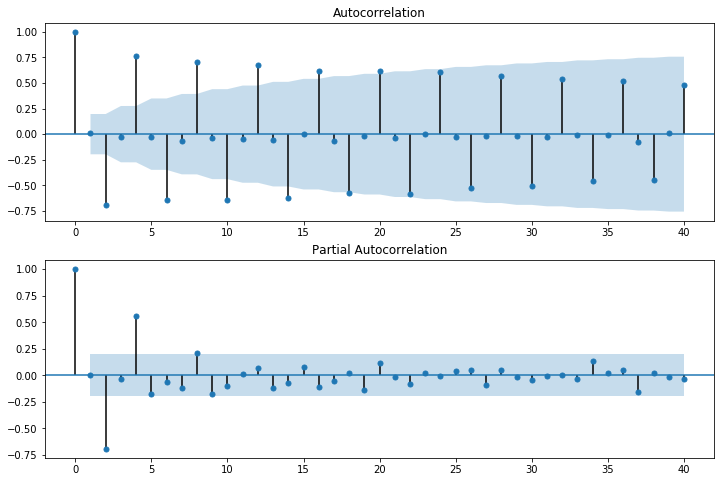

In [178]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(time1['Sales'][1:], lags=40, ax=ax1)   # first value of diff is NaN
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(time1['Sales'][1:], lags=40, ax=ax2)

It can be seen that ACF Plot has seasonal effects, in this case we can assume that ACF=order 'q' as '0' because we will continue with ARIMA model.<br>
While, on PACF plot, it can be seen that it has lags = 4, so PACF=order 'p' has order '4'.<br>
So, we could get the prediction model : <br>
**ARIMA(4,0,0)**

### Forecasting : Fitting Model = ARIMA (4,0,0)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


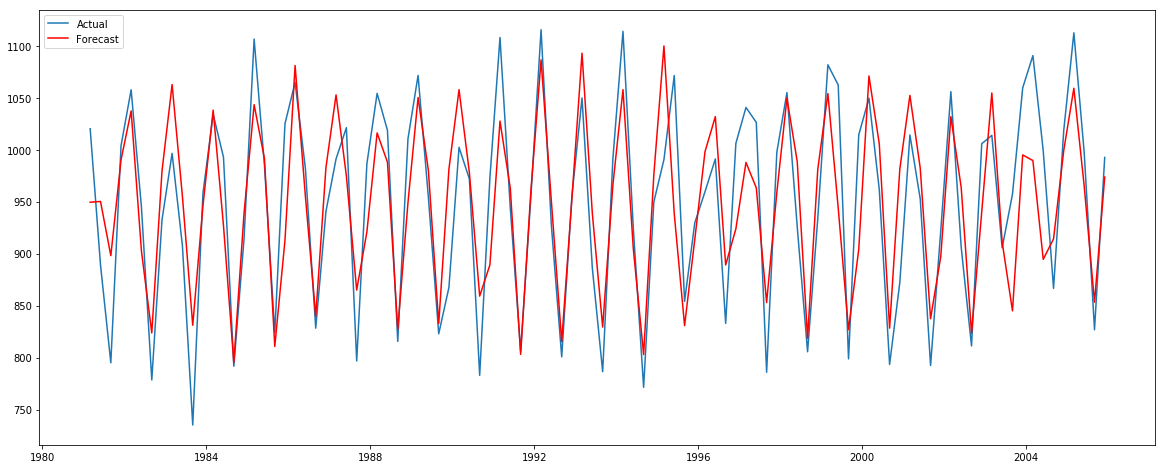

In [198]:
# fit ARIMA model
fig = plt.figure(figsize=(20,8))
model = ARIMA(time1, order=(4,0,0)) 
ax = plt.gca()
results = model.fit()
#Plot Fitting Model : Prediksi vs Aktual
plt.plot(time1['Sales'])
plt.plot(results.fittedvalues, color='red')
ax.legend(['Actual', 'Forecast'])


From the Plot of Fitted Model, it can be seen the predicted value is not far from the actual value.<br>
Below table is the summary of model.

In [197]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARMA
====================================================================
Model:              ARMA             BIC:                 1113.6785 
Dependent Variable: Sales            Log-Likelihood:      -543.02   
Date:               2019-09-05 14:53 Scale:               1.0000    
No. Observations:   100              Method:              css-mle   
Df Model:           5                Sample:              03-01-1981
Df Residuals:       95                                    12-01-2005
Converged:          1.0000           S.D. of innovations: 54.311    
AIC:                1098.0475        HQIC:                1104.374  
---------------------------------------------------------------------
              Coef.    Std.Err.     t      P>|t|    [0.025    0.975] 
---------------------------------------------------------------------
const        949.4899    7.9804  118.9780  0.0000  933.8486  965.1311
ar.L1.Sales    0.0164    0.0784    0.2084  0.8353   -0.1374    0.1701
ar.L2.Sales   -0.2741    0.0765   -3.5836  0.0005   -0.4240   -0.1242
ar.L3.Sales   -0.0195    0.0789   -0.2469  0.8056   -0.1741    0.1351
ar.L4.Sales    0.6149    0.0784    7.8417  0.0000    0.4612    0.7686
-----------------------------------------------------------------------------
                 Real           Imaginary          Modulus          Frequency
-----------------------------------------------------------------------------
AR.1           -1.2278            -0.0000           1.2278            -0.5000
AR.2            0.0117            -1.0351           1.0352            -0.2482
AR.3            0.0117             1.0351           1.0352             0.2482
AR.4            1.2361            -0.0000           1.2361            -0.0000
====================================================================

"""

### Forecasting : Prediction Results

In [239]:
predict1= pd.DataFrame(pd.Series(results.fittedvalues, copy=True))
hasil=pd.concat([predict1,time1],axis=1)
hasil.head()

,0,Sales
1981-03-01,949.489856,1020.2
1981-06-01,950.225965,889.2
1981-09-01,898.070006,795.0
1981-12-01,990.241296,1003.9
1982-03-01,1037.377835,1057.7


In [240]:
hasil.columns=['Prediksi','Sales']

In [241]:
hasil.head()

,Prediksi,Sales
1981-03-01,949.489856,1020.2
1981-06-01,950.225965,889.2
1981-09-01,898.070006,795.0
1981-12-01,990.241296,1003.9
1982-03-01,1037.377835,1057.7


In [242]:
hasil.tail()

,Prediksi,Sales
2004-12-01,999.485026,1018.7
2005-03-01,1059.144515,1112.5
2005-06-01,965.179196,997.4
2005-09-01,853.276852,826.8
2005-12-01,973.732256,992.6


### Forecasting : Model Evaluation

In [243]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax        
    return({'MAPE':mape, 'ME':me, 'MAE': mae, 
            'MPE': mpe, 'RMSE':rmse, 
            'CORR':corr, 'MINMAX':minmax})


forecast_accuracy(results.predict(),time1['Sales'])

{'CORR': 0.8251388939764943,
 'MAE': 45.318408648576316,
 'MAPE': 0.04785676998500506,
 'ME': -0.5736970942665756,
 'MINMAX': 0.046197744520158346,
 'MPE': 0.0029926955865763345,
 'RMSE': 55.236371173184985}

From 'MAPE' evaluation we used, the error value of ARIMA model is 4.7%. <br>
So, it can be concluded that our model is pretty good to predict 'Sales' in future periode.

## 4. PREDICT THE NEXT THREE PERIOD (ARIMA)
Testing the model with predicting 'Sales' on the next three period of time.

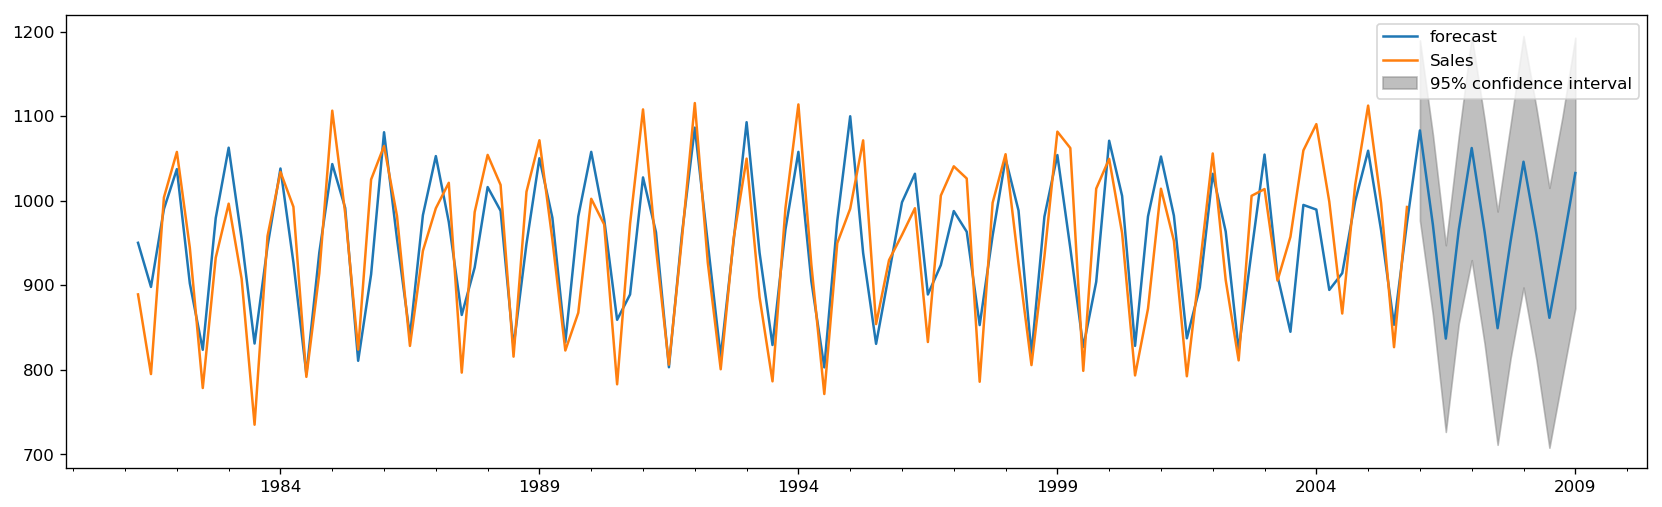

In [238]:
fig = plt.figure(figsize=(20,8))
results.plot_predict(1,112)
x=results.forecast(steps=100)

The plot above is the prediction of the next three period of time. The shadow part in Plot above is showing the 'Sales' prediction on the next three period of time from dataset 'time'.

## 5. MACHINE LEARNING MODEL II
### Forecasting II : Fitting Model = SARIMA
When dealing with seasonal effects, can be seen on ACF plot above, seasonal ARIMA is used, which is denoted as ARIMA(p,d,q)(P,D,Q)s. Here, (p, d, q) are the nonseasonal parameters, (P, D, Q) follow the same definition but are applied to the seasonal component of the time series. The term s is the periodicity of the time series.

In [345]:
# Define the p, d, and q parameters to take any value between 0 and 1
p =q = d = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 4) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 4)
SARIMAX: (0, 0, 1) x (0, 1, 0, 4)
SARIMAX: (0, 1, 0) x (0, 1, 1, 4)
SARIMAX: (0, 1, 0) x (1, 0, 0, 4)


Split the data into training and testing. Select a subset of the data series as training data, let's say 80:20. Our goal is to predict 'Sales' on the next three period of time.

In [346]:
train_size = int(len(time1)*0.8)
train_size

80

In [347]:
train = time1[0:train_size]
test = time1[train_size:]
print(train.shape)
print(test.shape)

(80, 1)
(20, 1)


'statsmodels.tsa.statespace.sarimax' returns values for AIC (Akaike Information Criterion) and BIC (Bayes Information Criterion) that can be minimized to select the best fitting model. We use the AIC value, which estimates the information lost when a given model is used to represent the process that generates the data. In doing so, it deals with the trade-off between the goodness of fit of the model and the complexity of the model itself.

In [348]:
AIC = []
SARIMAX_model = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results2 = mod.fit()

            print('SARIMAX{}x{} - AIC:{}'.format(param, param_seasonal, results2.aic), end='\r')
            AIC.append(results2.aic)
            SARIMAX_model.append([param, param_seasonal])
        except:
            continue

In [349]:
print('The smallest AIC is {} for model SARIMAX{}x{}'.format(min(AIC), SARIMAX_model[AIC.index(min(AIC))][0],SARIMAX_model[AIC.index(min(AIC))][1]))

The smallest AIC is 738.9219896959846 for model SARIMAX(0, 1, 1)x(0, 1, 1, 4)


In [350]:
# Fit this model
mod = sm.tsa.statespace.SARIMAX(train,
                                order=SARIMAX_model[AIC.index(min(AIC))][0],
                                seasonal_order=SARIMAX_model[AIC.index(min(AIC))][1],
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results2 = mod.fit()

In [351]:
#Here is the summarize of the model
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                             Sales   No. Observations:                   80
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 4)   Log Likelihood                -366.461
Date:                           Thu, 05 Sep 2019   AIC                            738.922
Time:                                   22:43:14   BIC                            746.068
Sample:                               03-01-1981   HQIC                           741.787
                                    - 12-01-2000                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0000    110.035     -0.009      0.993    -216.664     214.664
ma.S.L4       -1.0000    110.068     -0.009      0.993    -216.729     214.729
sigma2      1945.4031      0.058   3.38e+04      0.000    1945.290    1945.516
===================================================================================
Ljung-Box (Q):                       27.73   Jarque-Bera (JB):                 0.32
Prob(Q):                              0.93   Prob(JB):                         0.85
Heteroskedasticity (H):               1.82   Skew:                            -0.11
Prob(H) (two-sided):                  0.16   Kurtosis:                         3.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.1e+23. Standard errors may be unstable.
"""

Once the model has been fitted, we can check if does what we expect and if the assumptions we made are violated. To do this, we can use the 'plot_diagnostics' method.

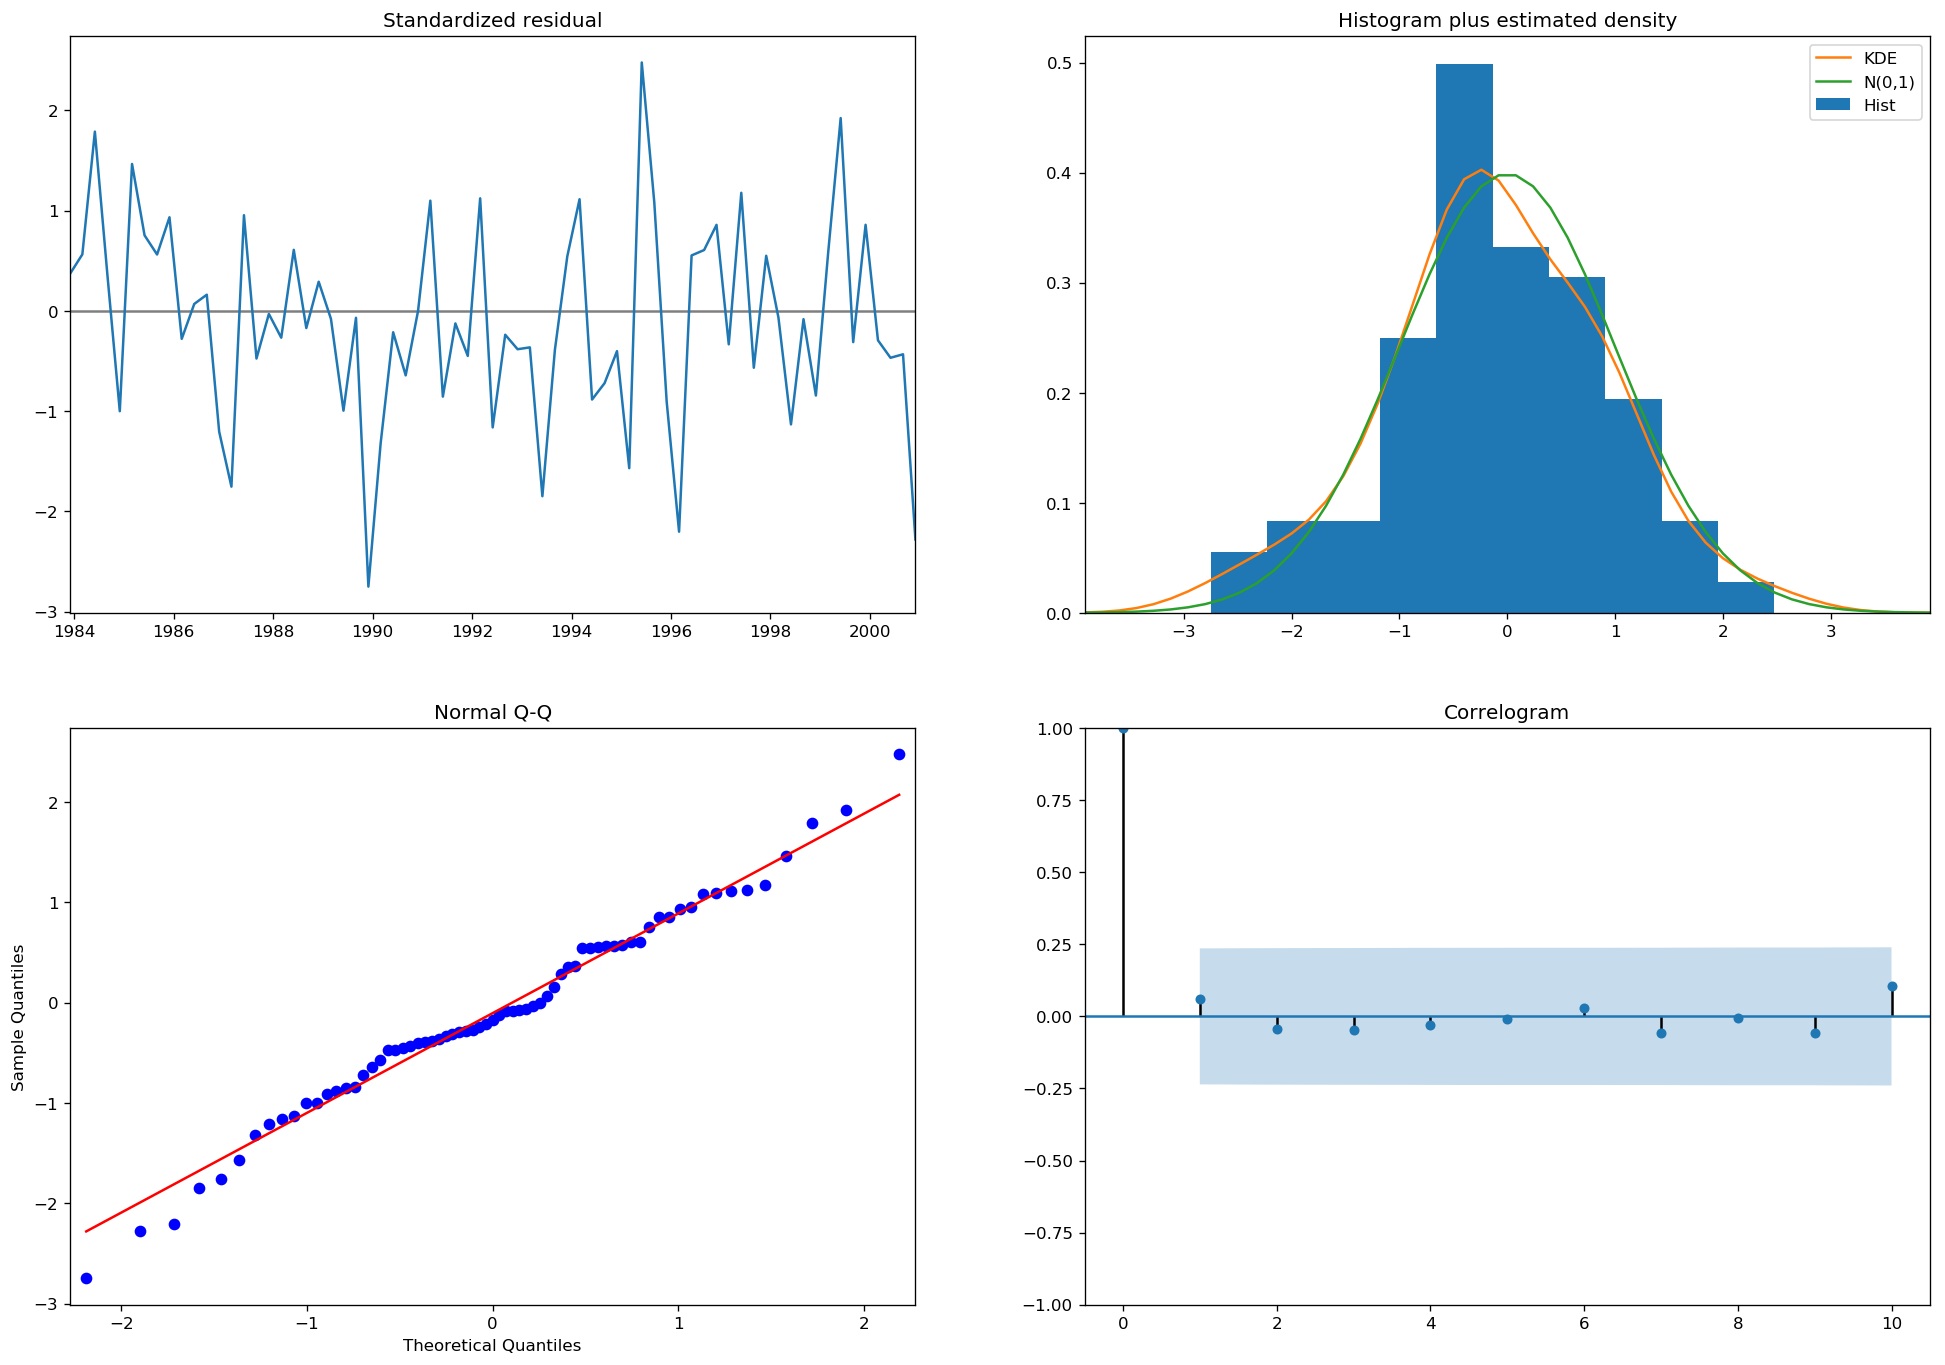

In [352]:
results2.plot_diagnostics(figsize=(20, 14))
plt.show()

In the plots above, we can observe that the residuals are uncorrelated (bottom right plot) and do not exhibit any obvious seasonality (the top left plot). Also, the residuals and roughly normally distributed with zero mean (top right plot). The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) roughly follows the linear trend of samples taken from a standard normal distribution with N(0, 1). Again, this is a strong indication that the residuals are normally distributed.

### Forecasting : Prediction Results on Training Dataset

In [378]:
predict2 = results2.predict(start=1)
train1 = pd.DataFrame(predict2, columns=['Prediksi'])
train1['Actual'] = train.values[1:]
train1.head()

,Prediksi,Actual
1981-06-01,1020.200000,889.2
1981-09-01,889.327306,795.0
1981-12-01,795.091578,1003.9
1982-03-01,1683.830610,1057.7
1982-06-01,927.465183,944.4


### Forecasting : Prediction Results on Testing Dataset

In [372]:
predict3 = results2.forecast(len(test))
test1 = pd.DataFrame(predict3, columns=['Prediksi'], index=test.index)
test1['Actual'] = test.values
test1.head()

,Prediksi,Actual
2001-03-01,1057.705144,1014.2
2001-06-01,977.782106,952.6
2001-09-01,808.763508,792.4
2001-12-01,969.270186,922.3
2002-03-01,1058.510143,1055.9


### Forecasting : Model Evaluation
By using MAPE.

In [405]:
prediction = pred2.predicted_mean['2001-03-01':'2005-12-01'].values
# flatten nested list
truth = list(itertools.chain.from_iterable(test.values))
# Mean Absolute Percentage Error
MAPE = np.mean(np.abs((truth - prediction) / truth)) * 100

print('The Mean Absolute Percentage Error for forecasting the testing data is {:.15f}%'.format(MAPE))

The Mean Absolute Percentage Error for forecasting the testing data is 4.410248403711813%


From 'MAPE' evaluation we used, the error value of SARIMA model is 4.4%. <br>
So, it can be concluded that our model is pretty good to predict 'Sales' in future periode.

## 6. PREDICT THE NEXT THREE PERIOD (SARIMA)
Testing the model with predicting 'Sales' on the next three period of time with 'predicted_mean'

In [390]:
pred2 = results2.get_forecast('2008-12-01')
pred2_ci = pred2.conf_int()
print(pred2.predicted_mean['2001-03-01':'2005-12-01'])

2001-03-01    1057.705144
2001-06-01     977.782106
2001-09-01     808.763508
2001-12-01     969.270186
2002-03-01    1058.510143
2002-06-01     978.587104
2002-09-01     809.568506
2002-12-01     970.075185
2003-03-01    1059.315141
2003-06-01     979.392103
2003-09-01     810.373504
2003-12-01     970.880183
2004-03-01    1060.120139
2004-06-01     980.197101
2004-09-01     811.178503
2004-12-01     971.685181
2005-03-01    1060.925138
2005-06-01     981.002099
2005-09-01     811.983501
2005-12-01     972.490180
Freq: QS-DEC, dtype: float64


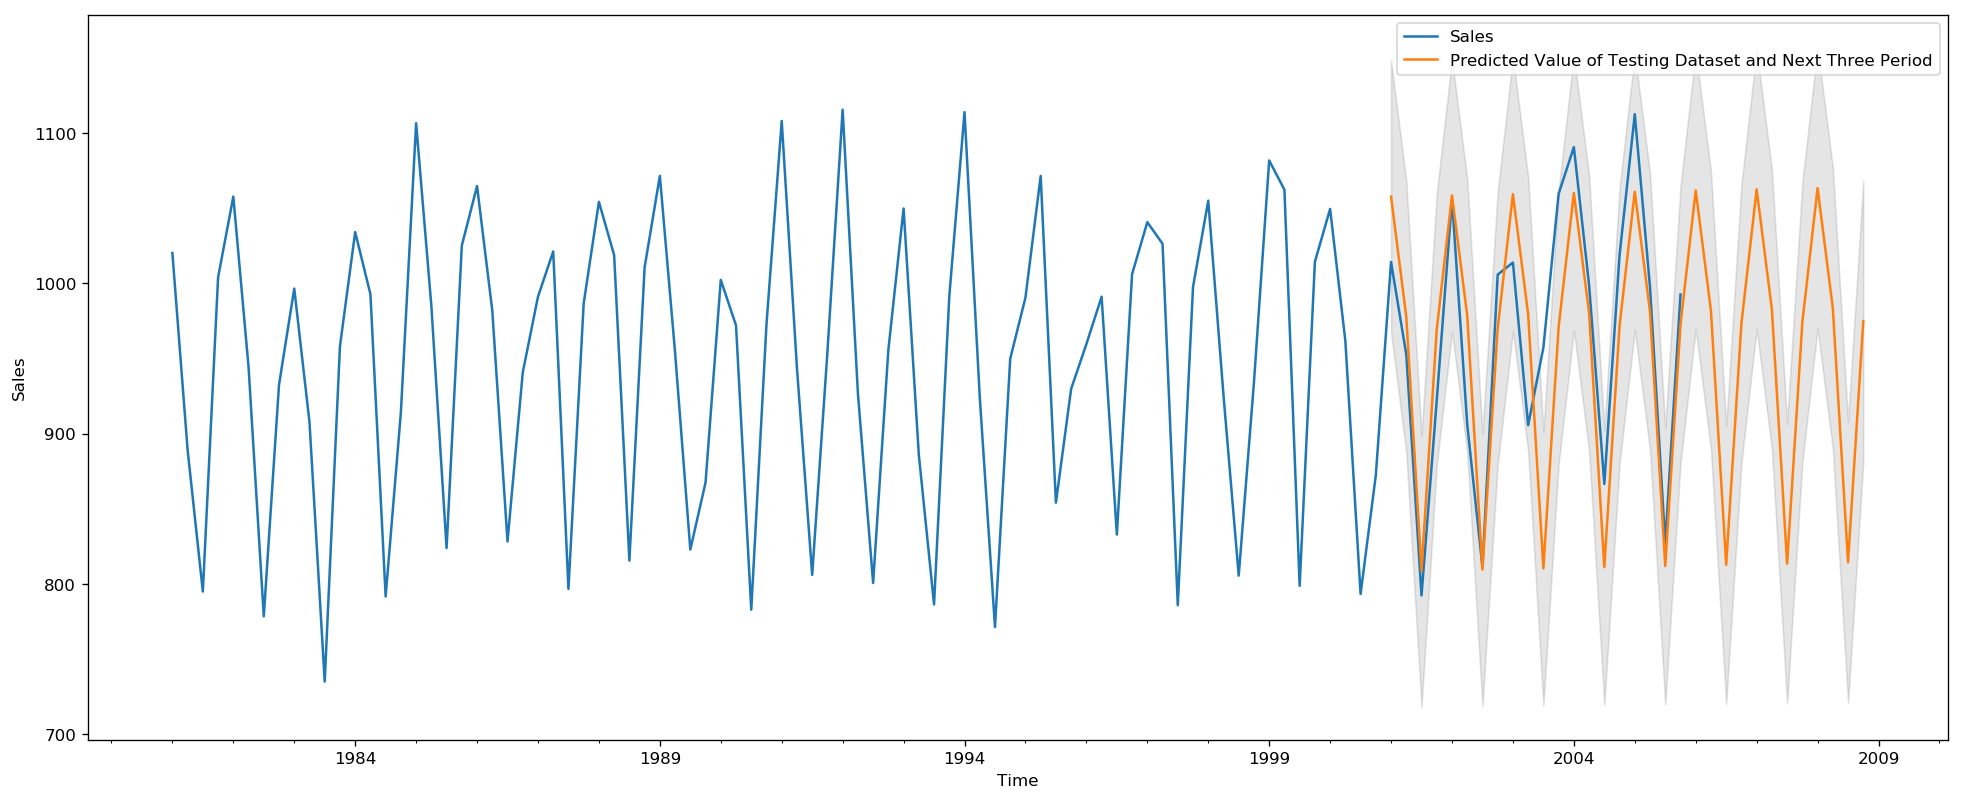

In [398]:
ax = time1.plot(figsize=(20, 8))
pred2.predicted_mean.plot(ax=ax, label='Predicted Value of Testing Dataset and Next Three Period')
ax.fill_between(pred2_ci.index, pred2_ci.iloc[:, 0], pred2_ci.iloc[:, 1], color='k', alpha=.1)
plt.ylabel('Sales')
plt.xlabel('Time')
plt.legend()
plt.show()

The plot above is the prediction of the next three period of time. The shadow part in Plot above is showing the 'Sales' prediction on the testing data and the next three period of time from dataset 'time'.

## 7. DECISION MAKING

## Conclusion : 

From both models it can be seen that the best parameter for each model is:<br>
    1. ARIMA = ARMA = ARIMA(4,0,0)
    2. SARIMA = SARIMAX(0, 1, 1)x(0, 1, 1, 4)

Looking at both figure plot of predicting Sales on the next three period of time, the model seems to do a pretty good job at modeling the time series. The orange lines are, as expected, very close to the blue lines which is the actual value. What is more interesting is the gray line, the out of sample prediction. For such time series, the ARIMA and SARIMA model is able to forecast Sales on the next three period or more time values accurately.<br>

From the results of the two models above, the MAPE value for each model is:<br>
    1. ARIMA Model = 4.7% <br>
    2. SARIMA Model = 4.4% <br>
From both models it can be concluded that the model with better accuracy or smaller MAPE value is the SARIMA Model. So it can be concluded that the best model to predict Sales of this time series data between the two models is the SARIMA Model.